In [33]:
import pymongo
import pandas as pd
from datetime import datetime
import datetime
import matplotlib.pyplot as plt

In [25]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.trading
collection = db.AAPL

In [26]:
df = pd.DataFrame(list(collection.find()))

In [27]:
df

,_id,date,open,high,low,close,volume,symbol
0,5f59e1b4bb8cdad4d1d0b613,2020-09-09T00:00:00.000Z,117.26,119.14,115.26,117.32,176940455.0,AAPL
1,5f59e1b4bb8cdad4d1d0b614,2020-09-08T00:00:00.000Z,113.95,118.99,112.68,112.82,231366563.0,AAPL
2,5f59e1b4bb8cdad4d1d0b615,2020-09-04T00:00:00.000Z,120.07,123.70,110.89,120.96,332607163.0,AAPL
3,5f59e1b4bb8cdad4d1d0b616,2020-09-03T00:00:00.000Z,126.91,128.84,120.50,120.88,257599640.0,AAPL
4,5f59e1b4bb8cdad4d1d0b617,2020-09-02T00:00:00.000Z,137.59,137.98,127.00,131.40,200118991.0,AAPL
...,...,...,...,...,...,...,...,...
5243,5f59e1b4bb8cdad4d1d0ca8e,1999-11-05T00:00:00.000Z,84.62,88.37,84.00,88.31,3721500.0,AAPL
5244,5f59e1b4bb8cdad4d1d0ca8f,1999-11-04T00:00:00.000Z,82.06,85.37,80.62,83.62,3384700.0,AAPL
5245,5f59e1b4bb8cdad4d1d0ca90,1999-11-03T00:00:00.000Z,81.62,83.25,81.00,81.50,2932700.0,AAPL
5246,5f59e1b4bb8cdad4d1d0ca91,1999-11-02T00:00:00.000Z,78.00,81.69,77.31,80.25,3564600.0,AAPL


In [28]:
df2 = df[['date', 'symbol', 'open', 'close', 'high', 'low', 'volume']]

In [29]:
df2['date'] =  df2['date'].apply(lambda x: datetime.fromisoformat(x[:-1]))

<ipython-input-29-5a71b69e3544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] =  df2['date'].apply(lambda x: datetime.fromisoformat(x[:-1]))


In [30]:
# df2.set_index('date')
df2

,date,symbol,open,close,high,low,volume
0,2020-09-09,AAPL,117.26,117.32,119.14,115.26,176940455.0
1,2020-09-08,AAPL,113.95,112.82,118.99,112.68,231366563.0
2,2020-09-04,AAPL,120.07,120.96,123.70,110.89,332607163.0
3,2020-09-03,AAPL,126.91,120.88,128.84,120.50,257599640.0
4,2020-09-02,AAPL,137.59,131.40,137.98,127.00,200118991.0
...,...,...,...,...,...,...,...
5243,1999-11-05,AAPL,84.62,88.31,88.37,84.00,3721500.0
5244,1999-11-04,AAPL,82.06,83.62,85.37,80.62,3384700.0
5245,1999-11-03,AAPL,81.62,81.50,83.25,81.00,2932700.0
5246,1999-11-02,AAPL,78.00,80.25,81.69,77.31,3564600.0


In [32]:
df.index.name=None  #将index的name取消
df.reset_index(inplace=True)
df.drop(df.index[114], inplace=True)
start = datetime.datetime.strptime("1973-01-01", "%Y-%m-%d") #把一个时间字符串解析为时间元组
date_list = [start + relativedelta(months=x) for x in range(0,114)]  #从1973-01-01开始逐月增加组成list
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None
df.columns= ['riders']
df['riders'] = df.riders.apply(lambda x: int(x)*100)
df.riders.plot(figsize=(12,8), title= 'Monthly Ridership', fontsize=14)
#plt.savefig('month_ridership.png', bbox_inches='tight')

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

<AxesSubplot:title={'center':'Stocks by day'}>

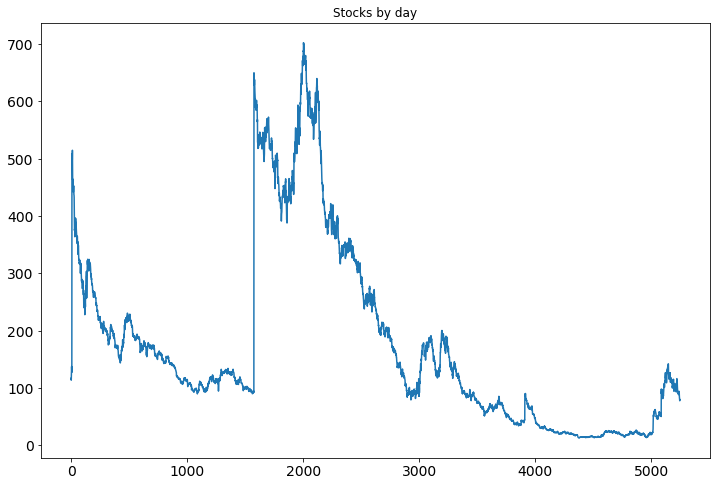

In [34]:
df2.open.plot(figsize=(12,8), title= 'Stocks by day', fontsize=14)